# 05_04: Smoothing Time Series Data

In [14]:
import math
import collections
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [15]:
import getweather

def fillnans(array):
    x = np.arange(len(array))
    good = ~np.isnan(array)
    
    return np.interp(x, x[good], array[good])

In [16]:
hilo = getweather.getyear('HILO',['TMIN','TMAX'], 2000)
# Hilo is a big island in Hawaii

In [17]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])
# filling the missing value for TMIN and TMAX

In [18]:
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])

(19.102739726027398, 14.4, 23.3)

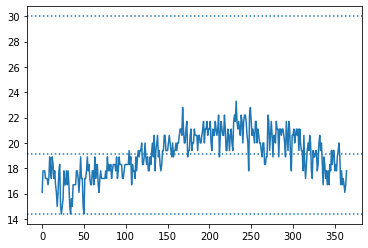

In [19]:
pp.plot(hilo['TMIN'])

for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMAX'])]:
    pp.axhline(value, linestyle=':')

In [20]:
mean, err = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))

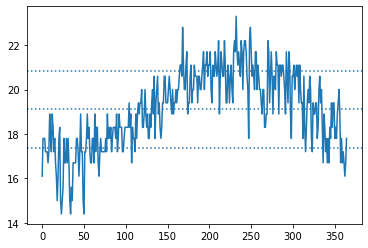

In [21]:
pp.plot(hilo['TMIN'])

for value in [mean, mean-err, mean+err]:
    pp.axhline(value, linestyle=':')

In [22]:
rain = getweather.getyear('HILO', ['PRCP'], 2000)['PRCP']

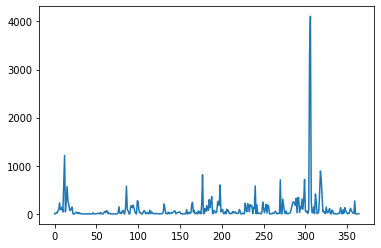

In [23]:
pp.plot(rain)

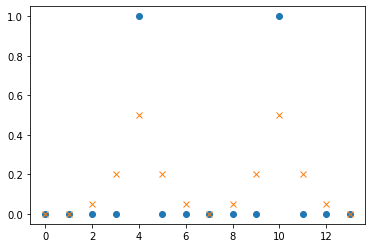

In [25]:
x = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]) # then plot

# add in second stage
mask = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
y = np.correlate(x, mask, 'same')

# plot in first stage
pp.plot(x, 'o')

# add in second stage
pp.plot(y, 'x')

In [26]:
np.ones(10)/10

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

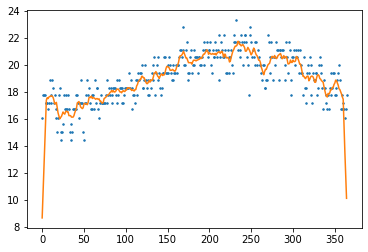

In [27]:
pp.plot(hilo['TMIN'],'.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10,'same')) # same vs valid

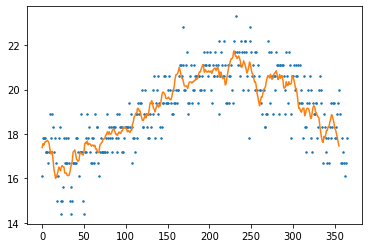

In [28]:
pp.plot(hilo['TMIN'],'.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10,'valid')) # same vs valid
# this plot will ignore the both begin and the end error (go down straigh away to bottom of above figure)

In [29]:
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

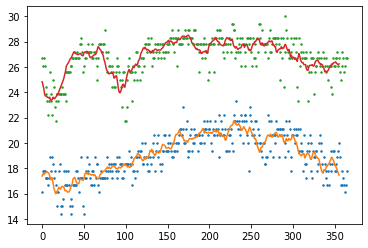

In [30]:
pp.plot(hilo['TMIN'],'.',ms=3)
pp.plot(smooth(hilo['TMIN'], 10))

pp.plot(hilo['TMAX'],'.', ms=3)
pp.plot(smooth(hilo['TMAX'], 10))

In [31]:
def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN','TMAX'], year)
    
    for obs in ['TMIN','TMAX']:
        stationdata[obs] = fillnans(stationdata[obs])
        
        
        # thinner points
        pp.plot(stationdata[obs],'.', ms=1)
        pp.plot(range(10, 356), smooth(stationdata[obs], 20))
        
    pp.title(station)
    pp.axis(xmin=1, xmax = 365, ymin=-10, ymax=45)

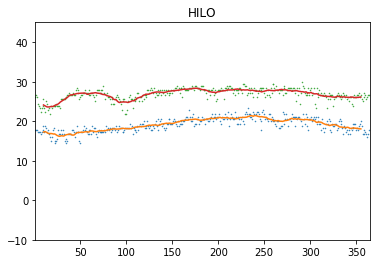

In [32]:
plotsmooth('HILO', 2000)

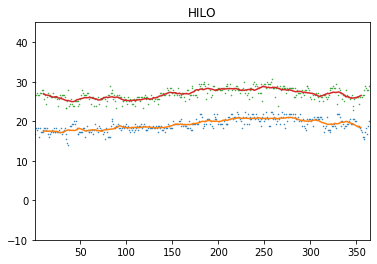

In [33]:
plotsmooth('HILO', 2001)

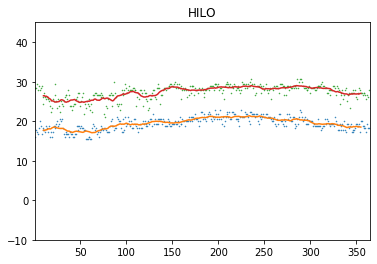

In [34]:
plotsmooth('HILO', 2002)

(0.0, 1.0, 15, 30)

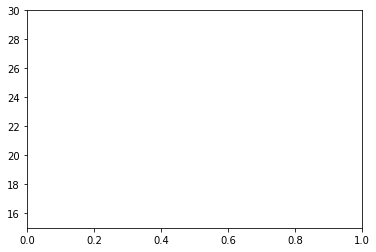

In [35]:
# add later
pp.axis(ymin=15, ymax=30)

(1.0, 365.0, 15, 30)

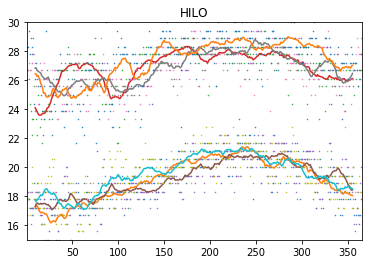

In [36]:
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)

# add later
pp.axis(ymin=15, ymax=30)
# set up the min for y-axis and max for it as well